In [2]:
%load_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Ellipse
import subprocess
from ipywidgets import interact

In [55]:
%autoreload 2
import numpy as np
import numpy.random as npr
from OSim import object

timesteps = 10
speed = 5
ellipseScaling = 1


o1 = object("1", 50, 50)
o2 = object("2", 25, 25)
o3 = object("3", 0, 0)
# o2.move(timesteps, speed)
o1.accelerate(timesteps, speed, 1)
o2.accelerate(timesteps, speed, 1)
o3.accelerate(timesteps, speed, 1)
# print(o1.tag, " should now exist with x at: ", o1.XPosList[0])
# meas = o1.measure()
meas = o1.clutterMeasure(0.05,50)
noise = o2.clutterMeasure(0.05,50)
# noise = o1.drivel(30)
noise2 = o1.drivel(30)
# noise2 = o3.clutterMeasure(0.05,50)
dir = [d*speed for d in o1.direction]


# with open('../cutting_emdw/build/src/bin/Xpos.txt', 'w') as f:
#     print(np.array2string(meas[0]))
#     f.writelines(np.array2string(meas[0], separator=',', suppress_small=True))

# with open('../cutting_emdw/build/src/bin/Ypos.txt', 'w') as f:
#     f.writelines(np.array2string(meas[1], separator=',', suppress_small=True))
    
with open('Xpos.txt', 'w') as f:
    f.writelines(np.array2string(noise[0], separator=',', suppress_small=True))
    f.writelines(np.array2string(meas[0], separator=',', suppress_small=True))
    f.writelines(np.array2string(noise2[0], separator=',', suppress_small=True))


with open('Ypos.txt', 'w') as f:
    f.writelines(np.array2string(noise[1], separator=',', suppress_small=True))
    f.writelines(np.array2string(meas[1], separator=',', suppress_small=True))
    f.writelines(np.array2string(noise2[1], separator=',', suppress_small=True))

# with open('dir.txt', 'w') as f:
#     f.write(str(dir))

# subprocess.call(['./OsAcuNicBu','7'])
subprocess.call(['./Om','1', 'n'])
pred = [None,None,None,None]
pred2 = [None,None,None,None]
pred3 = [None,None,None,None]
with open('xPred.txt', 'r') as f:
    pred[0] = [float(x) for x in f.readline().split(",")]
    pred2[0] = [float(x) for x in f.readline().split(",")]
    # pred3[0] = [float(x) for x in f.readline().split(",")]

with open('yPred.txt', 'r') as f:
    pred[1] = [float(y) for y in f.readline().split(",")]
    pred2[1] = [float(y) for y in f.readline().split(",")]
    # pred3[1] = [float(y) for y in f.readline().split(",")]

with open('xCovPred.txt', 'r') as f:
    pred[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
    pred2[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
    # pred3[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
    

with open('yCovPred.txt', 'r') as f:
    pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]
    pred2[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]
    # pred3[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

plt.rcParams["figure.figsize"] = (10,10)
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(o1.XPosList, o1.YPosList, 'b.', markersize=6)
plt.plot(o1.XPosList, o1.YPosList, 'b')
plt.plot(meas[0], meas[1], 'r.', markersize=6)
plt.plot(meas[0], meas[1], 'r')
plt.plot(pred[0], pred[1], 'g.', markersize=6)
plt.plot(pred[0], pred[1], 'g')

plt.plot(o2.XPosList, o2.YPosList, 'b.', markersize=6)
plt.plot(o2.XPosList, o2.YPosList, 'b')
plt.plot(noise[0], noise[1], 'm.', markersize=6)
plt.plot(noise[0], noise[1], 'm')
plt.plot(pred2[0], pred2[1], 'g.', markersize=6)
plt.plot(pred2[0], pred2[1], 'g')

# plt.plot(o3.XPosList, o3.YPosList, 'b.', markersize=6)
# plt.plot(o3.XPosList, o3.YPosList, 'b')
plt.plot(noise2[0], noise2[1], 'm.', markersize=6)
# plt.plot(noise2[0], noise2[1], 'm')
# plt.plot(pred3[0], pred3[1], 'g.', markersize=6)
# plt.plot(pred3[0], pred3[1], 'g')





for i in range(len(pred[0])):
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*pred[2][i], ellipseScaling*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*2*pred[2][i], ellipseScaling*2*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*3*pred[2][i], ellipseScaling*3*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)


entered DG
DID 132-133
DID 134-135
DID 136-137
object0
meas0


index0
messageDiscreteTable_V0
Vars: 1  132 
Domains:
2  0 1 

DefProb: 0 Margin: 0 RelFloor: 0
NoOfSparseProbs: 2
1  0  1.32591e-07
1  1  4.88279e-51

DiscreteTable_Marginalize<j>
DiscreteTable_InplaceNormalize<j>
DiscreteTable_Normalize<j>
DiscreteTable_InplaceAbsorb<j>
DiscreteTable_Absorb<j>
DiscreteTable_InplaceCancel<j>
DiscreteTable_Cancel<j>
DiscreteTable_ObserveAndReduce<j>
DiscreteTable_InplaceDamping<j>
DiscreteTable_Sampler<j>

object0
meas1


index1
messageDiscreteTable_V0
Vars: 1  134 
Domains:
2  0 1 

DefProb: 0 Margin: 0 RelFloor: 0
NoOfSparseProbs: 2
1  0  1.32591e-07
1  1  0.00753616

DiscreteTable_Marginalize<j>
DiscreteTable_InplaceNormalize<j>
DiscreteTable_Normalize<j>
DiscreteTable_InplaceAbsorb<j>
DiscreteTable_Absorb<j>
DiscreteTable_InplaceCancel<j>
DiscreteTable_Cancel<j>
DiscreteTable_ObserveAndReduce<j>
DiscreteTable_InplaceDamping<j>
DiscreteTable_Sampler<j>

object0
meas2


index2
messageDisc

KeyboardInterrupt: 

entered DG
DID 132-133
DID 134-135
DID 136-137
object0
meas0


index0
messageDiscreteTable_V0
Vars: 1  132 
Domains:
2  0 1 

DefProb: 0 Margin: 0 RelFloor: 0
NoOfSparseProbs: 2
1  0  1.32591e-07
1  1  5.27351e-17

DiscreteTable_Marginalize<j>
DiscreteTable_InplaceNormalize<j>
DiscreteTable_Normalize<j>
DiscreteTable_InplaceAbsorb<j>
DiscreteTable_Absorb<j>
DiscreteTable_InplaceCancel<j>
DiscreteTable_Cancel<j>
DiscreteTable_ObserveAndReduce<j>
DiscreteTable_InplaceDamping<j>
DiscreteTable_Sampler<j>

object0
meas1


index1
messageDiscreteTable_V0
Vars: 1  134 
Domains:
2  0 1 

DefProb: 0 Margin: 0 RelFloor: 0
NoOfSparseProbs: 2
1  0  1.32591e-07
1  1  0.00761266

DiscreteTable_Marginalize<j>
DiscreteTable_InplaceNormalize<j>
DiscreteTable_Normalize<j>
DiscreteTable_InplaceAbsorb<j>
DiscreteTable_Absorb<j>
DiscreteTable_InplaceCancel<j>
DiscreteTable_Cancel<j>
DiscreteTable_ObserveAndReduce<j>
DiscreteTable_InplaceDamping<j>
DiscreteTable_Sampler<j>

object0
meas2


index2
messageDisc

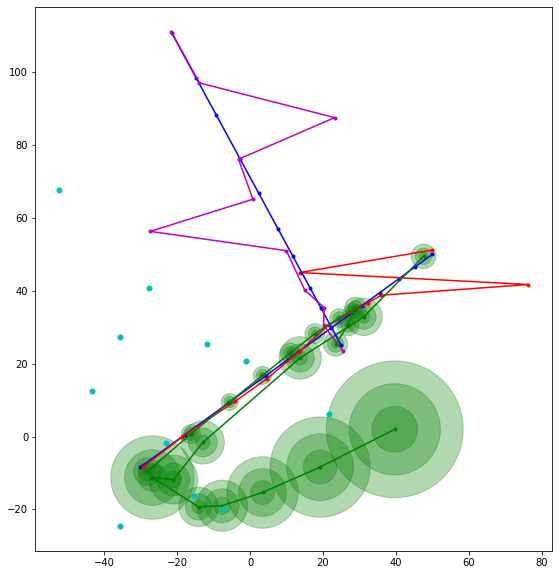

In [33]:
subprocess.call(['./Om','1', 'n'])
pred = [None,None,None,None]
pred2 = [None,None,None,None]
pred3 = [None,None,None,None]
with open('xPred.txt', 'r') as f:
    pred[0] = [float(x) for x in f.readline().split(",")]
    pred2[0] = [float(x) for x in f.readline().split(",")]
    # pred3[0] = [float(x) for x in f.readline().split(",")]

with open('yPred.txt', 'r') as f:
    pred[1] = [float(y) for y in f.readline().split(",")]
    pred2[1] = [float(y) for y in f.readline().split(",")]
    # pred3[1] = [float(y) for y in f.readline().split(",")]

with open('xCovPred.txt', 'r') as f:
    pred[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
    pred2[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
    # pred3[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
    

with open('yCovPred.txt', 'r') as f:
    pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]
    pred2[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]
    # pred3[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

plt.rcParams["figure.figsize"] = (15,15)
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(o1.XPosList, o1.YPosList, 'b.', markersize=6)
plt.plot(o1.XPosList, o1.YPosList, 'b')
plt.plot(meas[0], meas[1], 'r.', markersize=6)
plt.plot(meas[0], meas[1], 'r')
plt.plot(pred[0], pred[1], 'g.', markersize=6)
plt.plot(pred[0], pred[1], 'g')

plt.plot(o2.XPosList, o2.YPosList, 'b.', markersize=6)
plt.plot(o2.XPosList, o2.YPosList, 'b')
plt.plot(noise[0], noise[1], 'm.', markersize=6)
plt.plot(noise[0], noise[1], 'm')
plt.plot(pred2[0], pred2[1], 'g.', markersize=6)
plt.plot(pred2[0], pred2[1], 'g')

# plt.plot(o3.XPosList, o3.YPosList, 'b.', markersize=6)
# plt.plot(o3.XPosList, o3.YPosList, 'b')
plt.plot(noise2[0], noise2[1], 'c.', markersize=10)
# plt.plot(noise2[0], noise2[1], 'm')
# plt.plot(pred3[0], pred3[1], 'g.', markersize=6)
# plt.plot(pred3[0], pred3[1], 'g')





for i in range(len(pred[0])):
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*pred[2][i], ellipseScaling*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*2*pred[2][i], ellipseScaling*2*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*3*pred[2][i], ellipseScaling*3*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)

    
for i in range(len(pred2[0])):
    ellipse = Ellipse((pred2[0][i], pred2[1][i]), ellipseScaling*pred2[2][i], ellipseScaling*pred2[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred2[0][i], pred2[1][i]), ellipseScaling*2*pred2[2][i], ellipseScaling*2*pred2[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred2[0][i], pred2[1][i]), ellipseScaling*3*pred2[2][i], ellipseScaling*3*pred2[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)

# for i in range(len(pred3[0])):
#     ellipse = Ellipse((pred3[0][i], pred3[1][i]), ellipseScaling*pred3[2][i], ellipseScaling*pred3[3][i], alpha=0.3, color = 'g')
#     ax.add_artist(ellipse)
#     ellipse = Ellipse((pred3[0][i], pred3[1][i]), ellipseScaling*2*pred3[2][i], ellipseScaling*2*pred3[3][i], alpha=0.3, color = 'g')
#     ax.add_artist(ellipse)
#     ellipse = Ellipse((pred3[0][i], pred3[1][i]), ellipseScaling*3*pred3[2][i], ellipseScaling*3*pred3[3][i], alpha=0.3, color = 'g')
#     ax.add_artist(ellipse)

plt.savefig('noiseIncluded.png', dpi=300)

In [71]:
@interact(x=(1, 8))
def draw(x):
  subprocess.call(['./Om',str(x), 'd'])
  pred = [None,None,None,None]
  with open('xPred.txt', 'r') as f:
      pred[0] = [float(x) for x in f.readline().split(",")]

  with open('yPred.txt', 'r') as f:
      pred[1] = [float(y) for y in f.readline().split(",")]

  with open('xCovPred.txt', 'r') as f:
      pred[2] = [np.sqrt(float(y)) for y in f.readline().split(",")]

  with open('yCovPred.txt', 'r') as f:
      pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]

  fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

  plt.rcParams["figure.figsize"] = (10,10)
  plt.gca().set_aspect('equal', adjustable='box')

  plt.plot(o1.XPosList, o1.YPosList, 'b.', markersize=6)
  plt.plot(meas[0], meas[1], 'r.', markersize=6)
  plt.plot(pred[0], pred[1], 'g.', markersize=6)
  plt.plot(noise[0], noise[1], 'm.', markersize=8)
  plt.plot(noise2[0], noise2[1], 'c.', markersize=8)

  plt.plot(o1.XPosList, o1.YPosList, 'b')
  plt.plot(meas[0], meas[1], 'r')
  plt.plot(pred[0], pred[1], 'g')

  for i in range(len(pred[0])):
      ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*pred[2][i], ellipseScaling*pred[3][i], alpha=0.3, color = 'g')
      ax.add_artist(ellipse)
      ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*2*pred[2][i], ellipseScaling*2*pred[3][i], alpha=0.3, color = 'g')
      ax.add_artist(ellipse)
      ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*3*pred[2][i], ellipseScaling*3*pred[3][i], alpha=0.3, color = 'g')
      ax.add_artist(ellipse)

interactive(children=(IntSlider(value=4, description='x', max=8, min=1), Output()), _dom_classes=('widget-inte…

In [47]:
# baseMeas = meas
# baseMeas
meas

[array([25.45780133, 27.93126734, 31.69070933, 36.13657617, 43.57043246,
        50.28752509, 57.17693445, 64.96537114, 71.16900113, 80.1314718 ,
        88.45104785]),
 array([ 29.14093203,  25.21527718,  44.39667938,  13.25345042,
          3.85848646,  -3.31336738, -11.33255133, -22.77421352,
        -33.4969455 , -42.87756959, -51.01876896])]

start x parse1
end x parse
start Y parse 1
end y parse
measYList 
3  47.7418 52.2018 59.6111 
 measXList 
3  87.6494 87.9055 88.9219 
 noiseXList1 
0  
 noiseYList1 
0  
 noiseXList2 
0  
 noiseYList2 
0  
completed construction

forward loop0
updated hybrid meas clusters and down interface messages
Now use 'dot -Tpdf testGraph.dot > testGraph.dot.pdf' to generate a pdf picture
Sent 0 messages before convergence
updated discrete system and up interface messages
updated hybrid meas clusters from discrete messages
updated current pos cluster from measurements
updated next pos cluster
updated hybrid meas clusters and down interface messages
Now use 'dot -Tpdf testGraph.dot > testGraph.dot.pdf' to generate a pdf picture
Sent 0 messages before convergence
updated discrete system and up interface messages
updated hybrid meas clusters from discrete messages
updated last pos cluster from second last measurements
updated hybrid meas clusters and down interface messages
Now use 'dot -Tpdf testGr

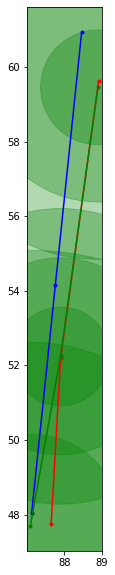

In [26]:
import subprocess

# print(meas)

subprocess.call(['./Om','1', 'd'])
pred = [None,None,None,None]
with open('xPred.txt', 'r') as f:
    pred[0] = [float(x) for x in f.readline().split(",")]

with open('yPred.txt', 'r') as f:
    pred[1] = [float(y) for y in f.readline().split(",")]

with open('xCovPred.txt', 'r') as f:
    pred[2] = [np.sqrt(float(y)) for y in f.readline().split(",")]

with open('yCovPred.txt', 'r') as f:
    pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

plt.rcParams["figure.figsize"] = (10,10)
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(o1.XPosList, o1.YPosList, 'b.', markersize=6)
plt.plot(meas[0], meas[1], 'r.', markersize=6)
plt.plot(pred[0], pred[1], 'g.', markersize=6)

plt.plot(o1.XPosList, o1.YPosList, 'b')
plt.plot(meas[0], meas[1], 'r')
plt.plot(pred[0], pred[1], 'g')

for i in range(len(pred[0])):
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*pred[2][i], ellipseScaling*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*2*pred[2][i], ellipseScaling*2*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*3*pred[2][i], ellipseScaling*3*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)


In [9]:
import subprocess
%autoreload 2
import numpy as np
import numpy.random as npr
from OSim import object

timesteps = 10
speed = 5
ellipseScaling = 1


o1 = object("1", 50, 50)
o1.move(timesteps, speed)
meas = o1.measure()
dir = [d*speed for d in o1.direction]

with open('dir.txt', 'w') as f:
    f.write(str(dir))

    
with open('Xpos.txt', 'w') as f:
    f.writelines(np.array2string(meas[0], separator=',', suppress_small=True))


with open('Ypos.txt', 'w') as f:
    f.writelines(np.array2string(meas[1], separator=',', suppress_small=True))

start x parse
end x parse
start Y parse
end y parse
completed construction 
completed forward messages
completed back messages


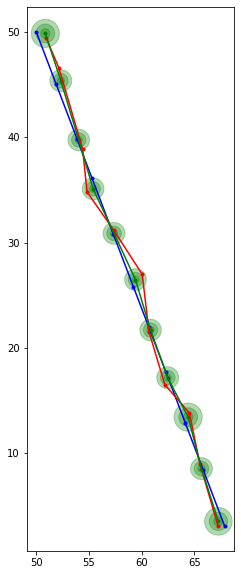

In [13]:

subprocess.call('./OsAcuNiBu')
pred = [None,None,None,None]
with open('xPred.txt', 'r') as f:
    pred[0] = [float(x) for x in f.readline().split(",")]

with open('yPred.txt', 'r') as f:
    pred[1] = [float(y) for y in f.readline().split(",")]

with open('xCovPred.txt', 'r') as f:
    pred[2] = [np.sqrt(float(y)) for y in f.readline().split(",")]

with open('yCovPred.txt', 'r') as f:
    pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

plt.rcParams["figure.figsize"] = (10,10)
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(o1.XPosList, o1.YPosList, 'b.', markersize=6)
plt.plot(meas[0], meas[1], 'r.', markersize=6)
plt.plot(pred[0], pred[1], 'g.', markersize=6)

plt.plot(o1.XPosList, o1.YPosList, 'b')
plt.plot(meas[0], meas[1], 'r')
plt.plot(pred[0], pred[1], 'g')

for i in range(len(pred[0])):
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*pred[2][i], ellipseScaling*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*2*pred[2][i], ellipseScaling*2*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*3*pred[2][i], ellipseScaling*3*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)


In [9]:
import subprocess

import os

objects = 3
states = 4

# pred = np.zeros((states,objects))

for i in range(objects):
    # Renaming the file
    os.rename("./Xpos"+str(i)+".txt", "./Xpos.txt")
    os.rename("./Ypos"+str(i)+".txt", "./Ypos.txt")

    subprocess.call('./OsVcuNi')

    os.rename("./xPred.txt", "./x-Pred"+str(i)+".txt")
    os.rename("./yPred.txt", "./y-Pred"+str(i)+".txt")
    os.rename("./Xpos.txt", "./Xpos"+str(i)+".txt")
    os.rename("./Ypos.txt", "./Ypos"+str(i)+".txt")
    



start x parse
end x parse
start Y parse
end y parse
start x parse
end x parse
start Y parse
end y parse
start x parse
end x parse
start Y parse
end y parse


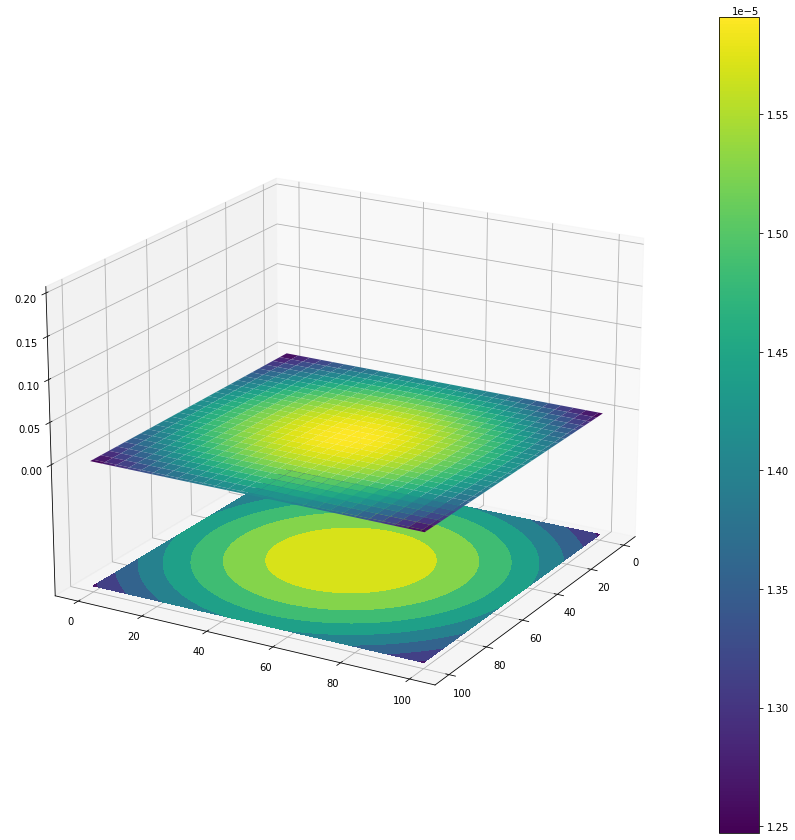

In [19]:


# Our 2-dimensional distribution will be over variables X and Y
N = 80
X = np.linspace(0., 100, N)
Y = np.linspace(0., 100, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([50., 50.])
XVar = 10000.
YVar = 10000.
Sigma = np.array([[ XVar , 0], [0, YVar]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
plt.rcParams["figure.figsize"] = (15,15)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(20, 30)

plt.colorbar(surf)

plt.show()

